In [93]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [94]:
df1 = pd.read_csv('/home/users/akshay/PCPpred/Caco2/features/Descriptors/Train_2d_3d_all_descriptors_Caco2.csv')

/tmp/ipykernel_2308767/2894403661.py:1: DtypeWarning: Columns (1275,1277,1280,1285,1298,1354,1356,1359,1364,1377,1579,1580,1581,1583,1584,1595,1596,1597) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/home/users/akshay/PCPpred/Caco2/features/Descriptors/Train_2d_3d_all_descriptors_Caco2.csv')


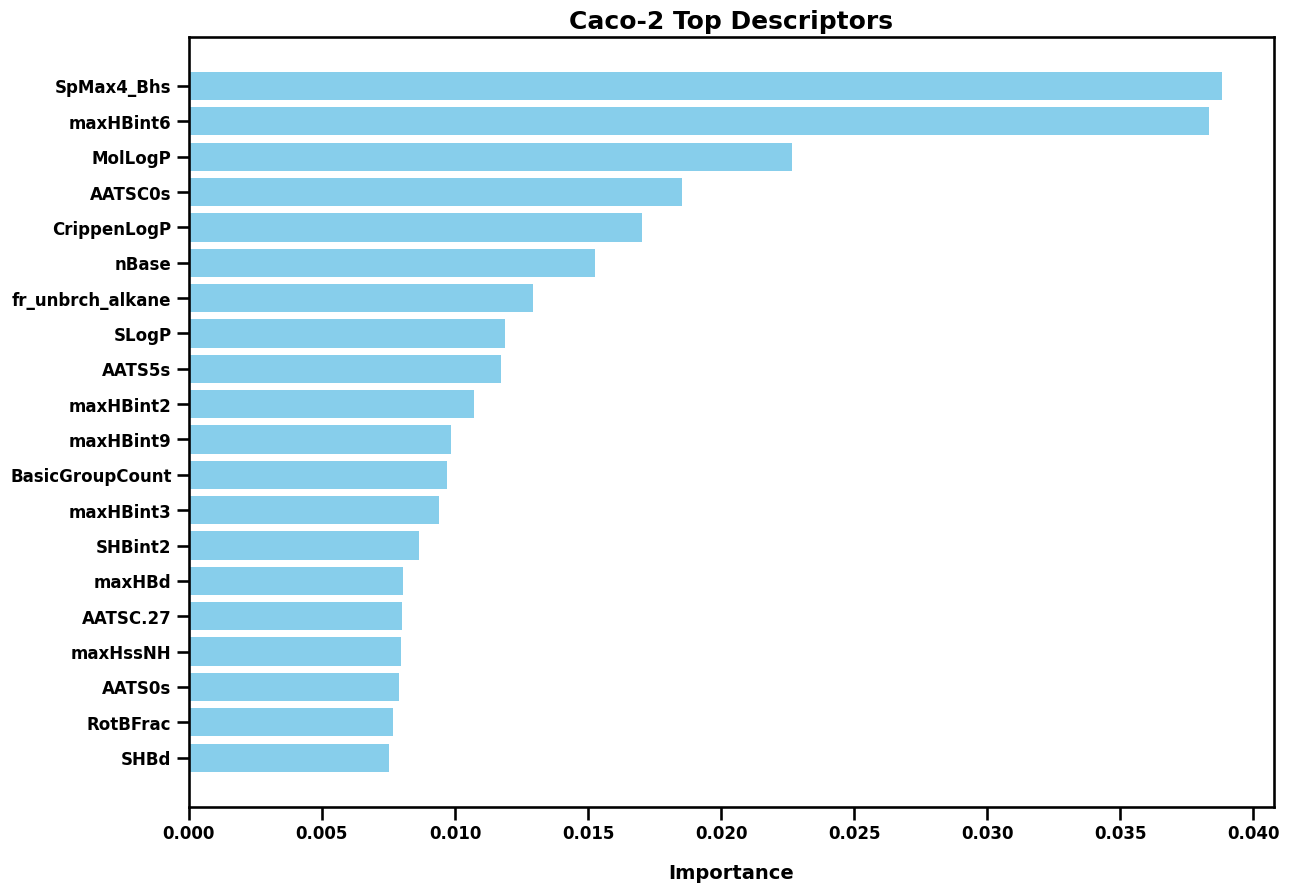

In [95]:
X_train = df1.drop(columns=['ID', 'SMILES', 'Permeability'])
X_train = X_train.select_dtypes(include=['number'])
y_train = df1['Permeability']

ET_model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, random_state=101)
ET_model.fit(X_train, y_train)

ET_importance_all = ET_model.feature_importances_
ET_feature_importance_df_all = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': ET_importance_all
})
ET_top_features_all = ET_feature_importance_df_all.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(14, 10))
bars = plt.barh(ET_top_features_all['Feature'], ET_top_features_all['Importance'], color='skyblue')

plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.xlabel('Importance', fontsize=14, labelpad=15)
plt.title('Caco-2 Top Descriptors', fontsize=18, fontweight='bold')
plt.gca().invert_yaxis()

save_path = '/home/users/akshay/PCPpred/Caco2/results/feature_analysis/imp_features_plot_caco2.png'
plt.savefig(save_path, dpi=600, bbox_inches='tight')
plt.show()

In [96]:
ET_feature_importance_df_all.to_csv('/home/users/akshay/PCPpred/Caco2/results/feature_analysis/Important_fingerprints_all_caco2.csv')

In [97]:
print("Top 20 Features - ExtraTrees:")
print(lgb_top_features_all)

Top 20 Features - ExtraTrees:
                   Feature  Importance
2427                  SHBd          27
104            VSA_EState9          24
3016              RotBFrac          24
1606  TopologicalCharge.17          23
583               AATSC.27          22
2676             maxHBint9          21
2673             maxHBint6          20
2552             minHBint4          19
2049               VR2_Dzv          18
1584   RotatableBondsRatio          17
25            BCUT2D_MRLOW          17
1041                Chi.33          14
58               PEOE_VSA7          14
3135                 TDB6e          13
1417         MolecularId.7          13
756                MATS.92          13
3194                FNSA-3          12
3229             geomShape          12
1416         MolecularId.6          12
667                 MATS.3          12


In [98]:
df1_test = pd.read_csv('/home/users/akshay/PCPpred/Caco2/features/Descriptors/Test_2d_3d_all_descriptors_Caco2.csv')

In [99]:
def top_features(df1, top_features):
   
    common_cols = ['ID', 'SMILES', 'Permeability']
    df = df1[common_cols + [col for col in top_features if col in df1.columns]]
    
    return df

In [100]:
df_train_all = top_features(df1, ET_top_features_all['Feature'].tolist())
df_train_all.head(10)

,ID,SMILES,Permeability,SpMax4_Bhs,maxHBint6,MolLogP,AATSC0s,CrippenLogP,nBase,fr_unbrch_alkane,...,maxHBint9,BasicGroupCount,maxHBint3,SHBint2,maxHBd,AATSC.27,maxHssNH,AATS0s,RotBFrac,SHBd
0,2065,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=...,-7.22,4.809153,3.284783,5.3805,1.918811,5.3805,0,0,...,3.289688,0,3.377396,12.036267,0.243034,1.918811,0.243034,4.718504,0.224000,0.836372
1,2067,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=...,-7.24,4.815507,4.324972,5.0383,1.939969,5.0383,0,0,...,4.391525,0,4.187695,17.494160,0.277623,1.939969,0.277623,4.759960,0.225806,1.263151
2,1914,CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](CCC...,-8.00,4.921591,6.221385,4.4597,2.221574,5.5405,0,1,...,6.280768,0,3.215839,29.883853,0.399439,2.221574,0.399439,5.136493,0.214286,1.439524
3,2026,CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[...,-5.64,4.822707,3.791880,3.7676,2.008846,3.7676,0,0,...,3.853147,0,3.768979,12.515304,0.256171,2.008846,0.256171,4.851544,0.213675,0.954368
4,1920,CCCCN1CC(=O)N(C)[C@@H](Cc2cccc(Cl)c2)C(=O)N[C@...,-7.05,4.920846,6.203435,4.2942,2.195954,5.3750,0,2,...,6.088345,0,3.396283,27.148642,0.403195,2.195954,0.403195,5.077250,0.232143,1.245795
5,1915,CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](CCC...,-7.03,4.921357,6.246991,3.8236,2.270971,4.9044,0,1,...,6.310294,0,3.602334,30.684169,0.401939,2.270971,0.401939,5.230427,0.209091,1.522751
6,1913,CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](CC(...,-8.06,4.912682,6.187362,3.8063,2.223546,4.8871,0,1,...,6.060650,0,3.374926,30.377027,0.402548,2.223546,0.402548,5.138282,0.216216,1.471990
7,1918,CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@H](C(=O...,-6.82,4.908048,6.252976,3.9025,2.220763,4.9833,0,1,...,6.276428,0,3.244011,27.234939,0.398962,2.220763,0.398962,5.130552,0.216216,1.251816
8,1921,CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](COC...,-7.22,4.889757,6.162511,4.1971,2.113549,5.2779,0,1,...,6.089122,0,3.185807,30.063318,0.400142,2.113549,0.400142,4.958690,0.223214,1.370035
9,2047,CC[C@H](C)[C@@H]1NC(=O)[C@@H](C)N(C)C(=O)C[C@@...,-5.96,4.829964,4.258573,3.0369,2.053163,3.0369,0,0,...,4.451115,0,4.188111,16.833738,0.287512,2.053163,0.287512,4.935934,0.191304,1.277453


In [101]:
df_test_all = top_features(df1_test, ET_top_features_all['Feature'].tolist())
df_test_all.head(10)

,ID,SMILES,Permeability,SpMax4_Bhs,maxHBint6,MolLogP,AATSC0s,CrippenLogP,nBase,fr_unbrch_alkane,...,maxHBint9,BasicGroupCount,maxHBint3,SHBint2,maxHBd,AATSC.27,maxHssNH,AATS0s,RotBFrac,SHBd
0,2064,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=...,-7.19,4.814998,3.543492,5.3821,1.918170,5.3821,0,0,...,3.475225,0,3.588551,12.803468,0.248569,1.918170,0.248569,4.713473,0.224000,0.887084
1,8066,CC[C@H]1C(=O)N[C@@H](COCCC(C)C)C(=O)N(C)[C@@H]...,-6.21,4.954777,3.907096,2.9743,1.877239,2.9743,0,0,...,3.843591,0,3.932571,21.692855,0.253450,1.877239,0.253450,4.595103,0.283186,1.837690
2,2068,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...,-7.24,4.815664,3.332900,6.1397,1.807886,6.1397,0,0,...,3.240640,0,3.310407,14.840305,0.216448,1.807886,0.216448,4.544964,0.188034,1.033493
3,2234,CC(C)C[C@H]1C(=O)N[C@@H](COC(C)(C)C)C(=O)N(C)[...,-5.85,4.934517,3.653066,4.3747,2.220190,4.3747,1,0,...,3.771791,1,3.650614,12.303836,0.250972,2.220190,0.250972,5.126302,0.150442,0.946697
4,2230,CC(C)C[C@H]1C(=O)N[C@H](C(=O)N2CCCCC2)CC(=O)N[...,-5.96,4.939148,3.871722,4.5478,2.176634,4.5478,1,0,...,3.934292,1,3.840930,16.193354,0.253084,2.176634,0.253084,5.040539,0.166667,1.134066
5,1923,CCCCN1CC(=O)N(C)[C@@H](C(C)C)C(=O)N[C@H](C(=O)...,-6.85,4.890743,6.192802,4.5243,2.128211,5.6051,0,1,...,6.213719,0,3.011551,26.217378,0.394909,2.128211,0.394909,4.958786,0.218182,1.117942
6,7974,CCN1CCCC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H]([C@...,-6.54,4.917247,3.614409,5.4288,2.443812,5.0877,0,0,...,3.574215,0,3.519487,12.796409,0.232785,2.443812,0.232785,5.459571,0.181818,1.025813
7,1924,CCCCN1CC(=O)N(C)[C@@H](Cc2ccccc2)C(=O)N[C@@H](...,-6.77,4.894328,6.187726,4.1358,2.151169,5.2166,0,1,...,6.079765,0,3.288759,26.682295,0.404144,2.151169,0.404144,4.999610,0.220183,1.143776
8,2060,CC(C)C[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@H]...,-7.00,4.842333,4.285418,4.2141,1.965287,4.2141,0,0,...,4.270231,0,4.119730,24.816024,0.281805,1.965287,0.281805,4.813615,0.214286,1.660498
9,7923,CC(C)CCOC[C@@H]1NC(=O)[C@H](CCc2ccccc2)NC(=O)[...,-7.05,4.898577,4.392141,3.9278,1.933989,3.9278,0,0,...,4.559358,0,4.331235,17.826121,0.298881,1.933989,0.298881,4.747259,0.198198,1.356052


In [102]:
def add_label_column(df):
    df = df.copy()
    df['Label'] = (df['Permeability'] >= -6).astype(int)
    return df

In [103]:
train_df_labeled = add_label_column(df_train_all)
test_df_labeled = add_label_column(df_test_all)
print(train_df_labeled.head(10))
print(test_df_labeled.head(10))

     ID                                             SMILES  Permeability  \
0  2065  CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=...         -7.22   
1  2067  CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=...         -7.24   
2  1914  CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](CCC...         -8.00   
3  2026  CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[...         -5.64   
4  1920  CCCCN1CC(=O)N(C)[C@@H](Cc2cccc(Cl)c2)C(=O)N[C@...         -7.05   
5  1915  CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](CCC...         -7.03   
6  1913  CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](CC(...         -8.06   
7  1918  CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@H](C(=O...         -6.82   
8  1921  CCCCN1CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](COC...         -7.22   
9  2047  CC[C@H](C)[C@@H]1NC(=O)[C@@H](C)N(C)C(=O)C[C@@...         -5.96   

   SpMax4_Bhs  maxHBint6  MolLogP   AATSC0s  CrippenLogP  nBase  \
0    4.809153   3.284783   5.3805  1.918811       5.3805      0   
1    4.815507   4.324972   5.

In [104]:
!pip install seaborn

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

In [116]:
def boxplots_diff_labels(df, features, label_col='Label', save_path='feature_box_plot.png'):
    num_features = len(features)
    cols = 5  
    rows = (num_features + cols - 1) // cols  

    plt.figure(figsize=(cols * 8, rows * 7))
    sns.set_style("whitegrid")

    label_mapping = {0: "Non-Permeable", 1: "Permeable"}

    for idx, feature in enumerate(features, 1):
        plt.subplot(rows, cols, idx)
        ax = sns.boxplot(x=label_col, y=feature, data=df, hue=label_col, palette="Set2", legend=False)

        plt.title(f'{feature}', fontsize=16, fontweight='600', pad=12)
        plt.xlabel("Permeability", fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.xticks(ticks=[0, 1], labels=[label_mapping[0], label_mapping[1]], fontsize=11)
        plt.yticks(fontsize=11)

    plt.tight_layout()
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()



def ttest_feature_tests(df, label_col='Label', feature_cols=None, save_path='ttest.csv'):
   
    
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    label_0_data = df[df[label_col] == 0]
    label_1_data = df[df[label_col] == 1]

    results = []
    alpha = 0.05 
    for feature in feature_cols:
        class0_vals = label_0_data[feature].dropna()
        class1_vals = label_1_data[feature].dropna()
        
        
        t_stat, p_val = stats.ttest_ind(class0_vals, class1_vals, equal_var=False)
        
        print(f"Feature: {feature}")
        print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")
        
        # Interpretation
        if p_val < alpha:
            print("Result: Reject the null hypothesis - significant difference between the two groups.\n")
        else:
            print("Result: Fail to reject the null hypothesis - no significant difference between the two groups.\n")
        
        results.append({'Feature': feature, 't-statistic': t_stat, 'p-value': p_val})

    results_df = pd.DataFrame(results).sort_values('p-value')
    results_df.to_csv(save_path, index=False)
    return results_df



def plot_top_feature_correlations(df, label_col='Label', permeability_col='Permeability',
                                   top_desc_features=None, save_path='feature_correlation_plot.png'):
    

    features = top_desc_features + [permeability_col, label_col]
    df_sub = df[features]

    corr_label0 = df_sub[df_sub[label_col] == 0].corr()[permeability_col].drop([permeability_col, label_col])
    corr_label1 = df_sub[df_sub[label_col] == 1].corr()[permeability_col].drop([permeability_col, label_col])

    corr_df = pd.DataFrame({
        'Feature': corr_label0.index,
        'Corr_Label_0': corr_label0.values,
        'Corr_Label_1': corr_label1.reindex(corr_label0.index).values
    })

    print("\nTop Features Correlation with Permeability by Label:\n")
    print(corr_df.to_string(index=False))

    plt.style.use('default')
    sns.set_context('talk')
    plt.rcParams.update({
        'font.family': 'DejaVu Sans',
        'axes.titleweight': 'bold',
        'axes.labelweight': 'bold'
    })

    fig, ax = plt.subplots(figsize=(18, 14))

    bar_height = 0.35
    n_features = len(corr_df)
    y_indexes = np.arange(n_features)

    colors_label0 = ['red'] * n_features
    colors_label1 = ['blue'] * n_features

    ax.barh(y_indexes + bar_height/2, corr_df['Corr_Label_0'], height=bar_height,
            color=colors_label0, label='Non-Permeable peptides', align='center')

    ax.barh(y_indexes - bar_height/2, corr_df['Corr_Label_1'], height=bar_height,
            color=colors_label1, label='Permeable peptides', align='center')

    ax.set_yticks(y_indexes)
    ax.set_yticklabels(corr_df['Feature'], fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    ax.set_xlabel('Correlation with Permeability', fontsize=16, fontweight='bold', labelpad=15)
    ax.set_title('Features Correlation with Permeability', fontsize=24, fontweight='bold', pad=25)

    ax.xaxis.grid(True, linestyle='--', linewidth=0.8, alpha=0.6)
    ax.yaxis.grid(False)
    ax.invert_yaxis()

    for spine in ['bottom', 'left', 'top', 'right']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(1)

    ax.tick_params(axis='both', which='major',
                   direction='out',
                   length=6,
                   width=1,
                   color='black',
                   labelsize=12)

    ax.legend(frameon=False, fontsize=16, loc='upper right', borderaxespad=0.5)

    plt.tight_layout()

  
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()

    return corr_df


In [117]:

feature_cols_train = [col for col in train_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

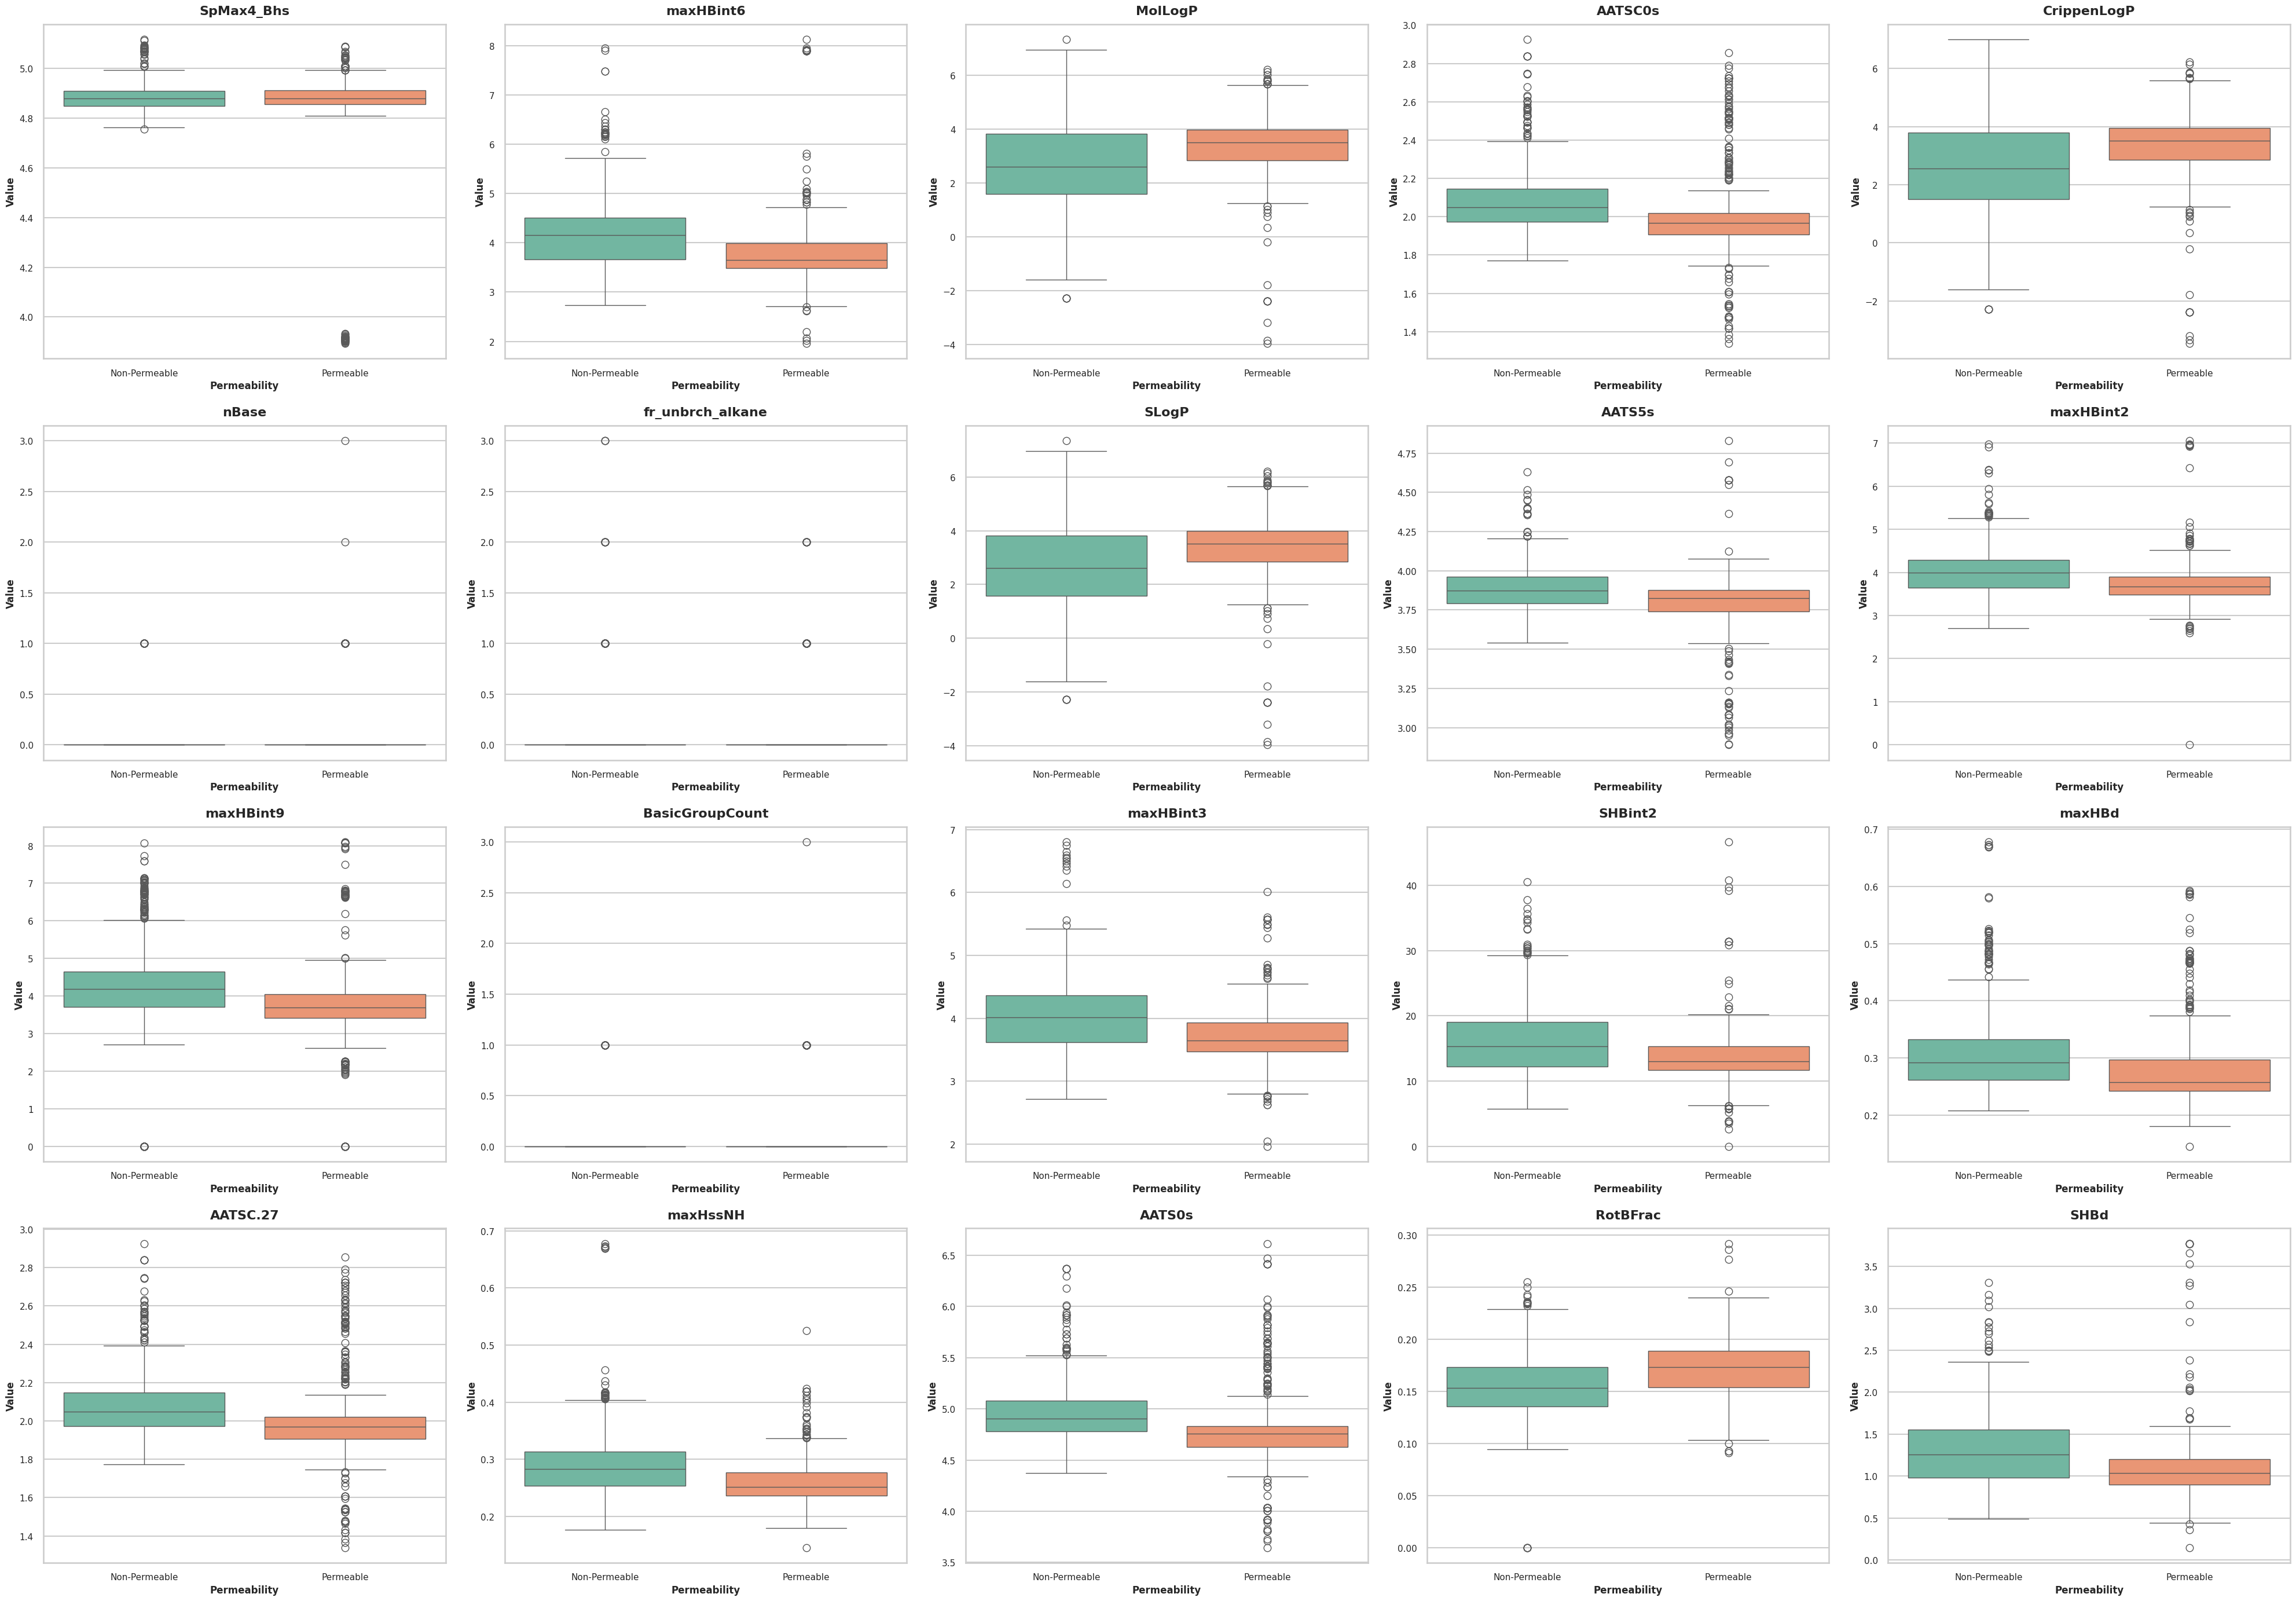

In [118]:
boxplots_diff_labels(train_df_labeled, feature_cols_train, label_col='Label', save_path = '/home/users/akshay/PCPpred/Caco2/results/feature_analysis/desc_train_box_plot_caco2.png')


Top Features Correlation with Permeability by Label:

         Feature  Corr_Label_0  Corr_Label_1
      SpMax4_Bhs      0.212478     -0.691539
       maxHBint6     -0.429380      0.002515
         MolLogP      0.429071     -0.292808
         AATSC0s     -0.189788     -0.451086
     CrippenLogP      0.413432     -0.309801
           nBase     -0.023043      0.473931
fr_unbrch_alkane      0.035754     -0.093636
           SLogP      0.429071     -0.292808
          AATS5s     -0.342485     -0.583661
       maxHBint2     -0.428828      0.097962
       maxHBint9     -0.146279     -0.261288
 BasicGroupCount     -0.023043      0.487383
       maxHBint3     -0.289547      0.111655
         SHBint2     -0.398394     -0.209305
          maxHBd     -0.226116      0.164958
        AATSC.27     -0.189788     -0.451086
        maxHssNH     -0.322346      0.266279
          AATS0s     -0.265563     -0.434541
        RotBFrac      0.172509     -0.349904
            SHBd     -0.382300     -0.084548


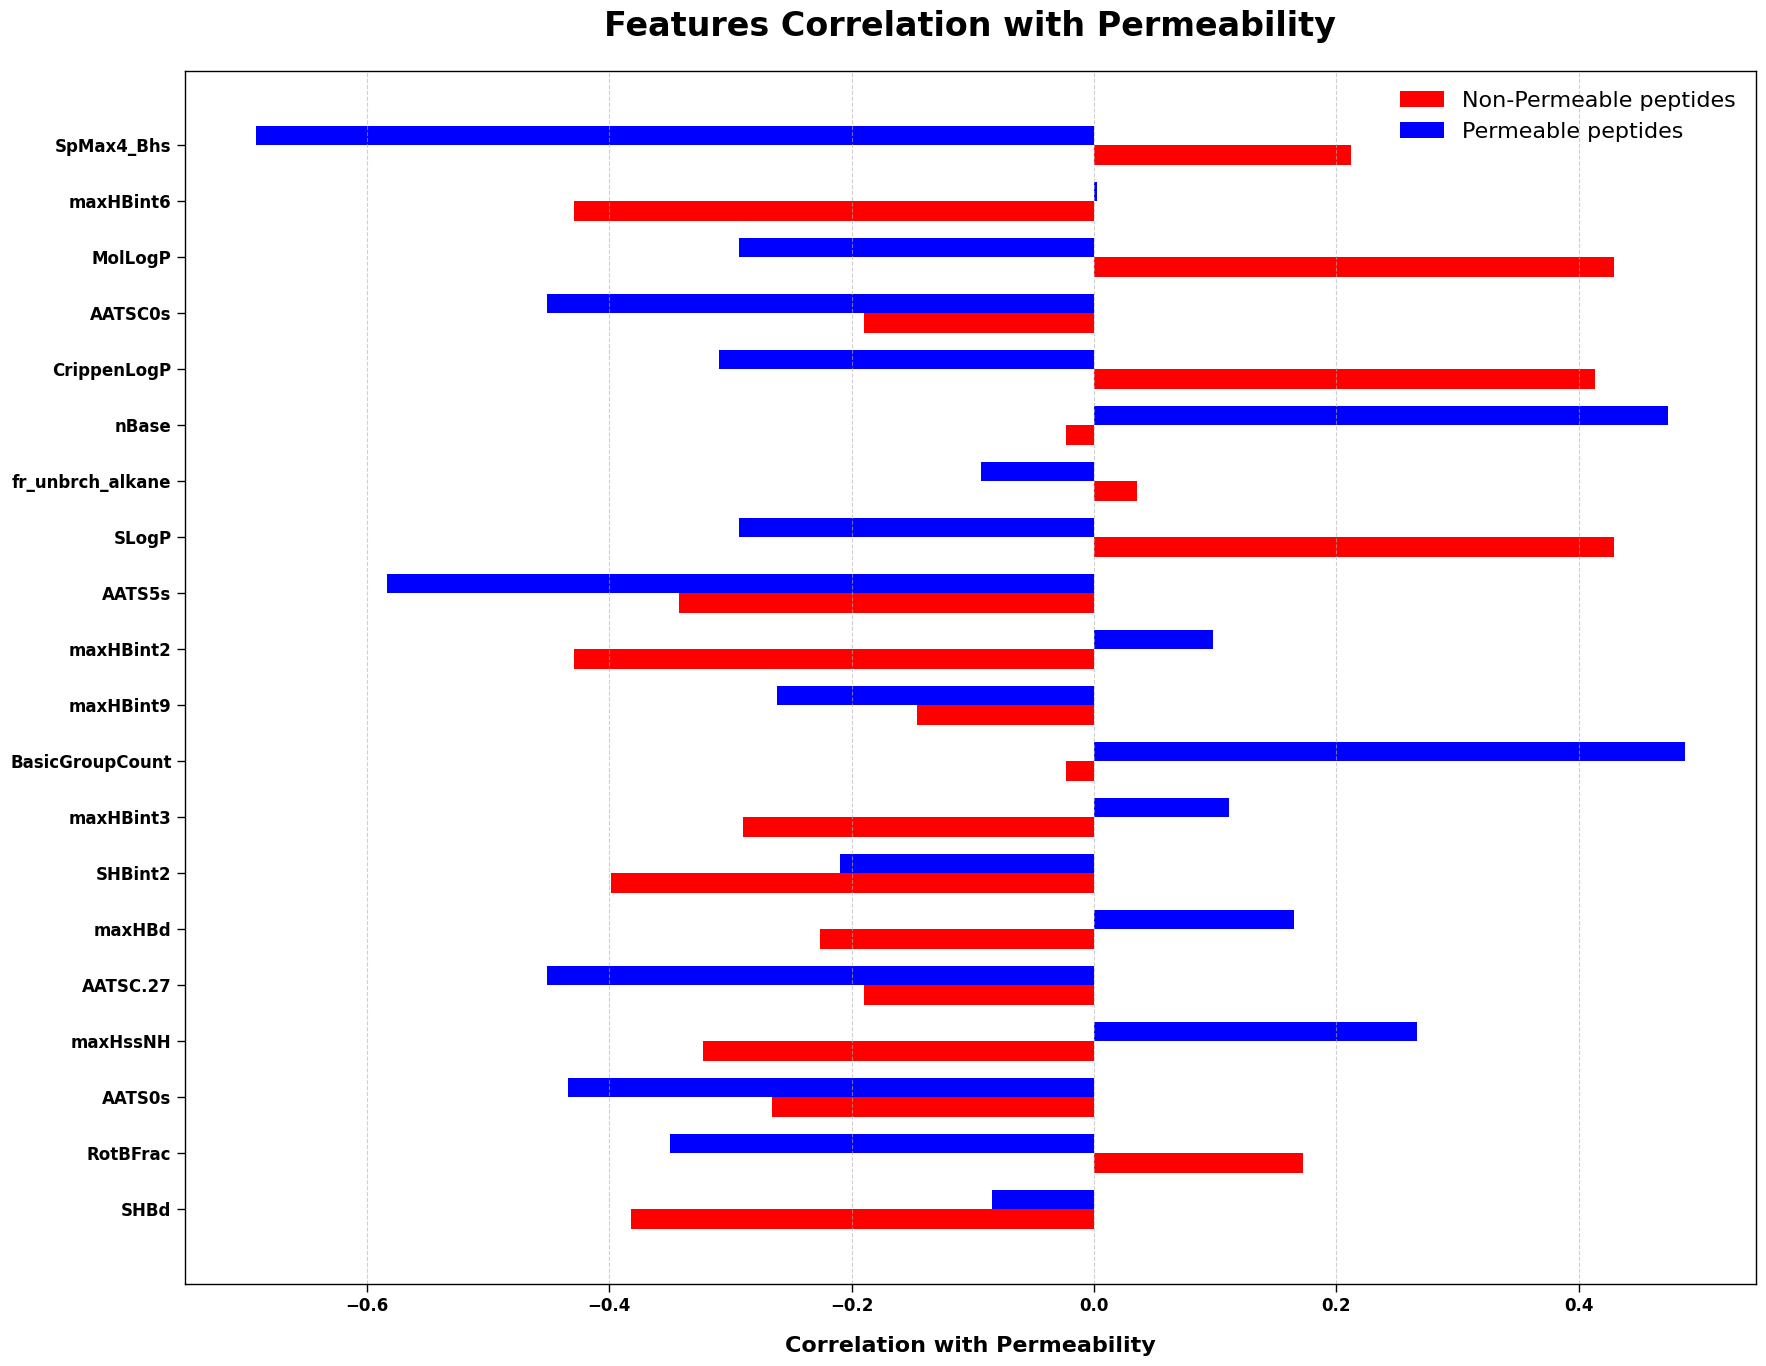

In [119]:
ET_top_features_list = ET_top_features_all['Feature'].to_list()
corr_df = plot_top_feature_correlations(
    train_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=ET_top_features_list,
    save_path = '/home/users/akshay/PCPpred/Caco2/results/feature_analysis/desc_train_corr_plot_caco2.png'
    
)

In [120]:
feature_cols_train

['SpMax4_Bhs',
 'maxHBint6',
 'MolLogP',
 'AATSC0s',
 'CrippenLogP',
 'nBase',
 'fr_unbrch_alkane',
 'SLogP',
 'AATS5s',
 'maxHBint2',
 'maxHBint9',
 'BasicGroupCount',
 'maxHBint3',
 'SHBint2',
 'maxHBd',
 'AATSC.27',
 'maxHssNH',
 'AATS0s',
 'RotBFrac',
 'SHBd']

In [121]:
ttest_df_train = ttest_feature_tests(train_df_labeled, label_col='Label', feature_cols=feature_cols_train, save_path = '/home/users/akshay/PCPpred/Caco2/results/feature_analysis/caco2_train_ttest.csv')
print(ttest_df_train)

Feature: SpMax4_Bhs
T-Statistic: 5.5500, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: maxHBint6
T-Statistic: 8.5538, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: MolLogP
T-Statistic: -7.5214, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: AATSC0s
T-Statistic: 6.7611, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: CrippenLogP
T-Statistic: -7.2170, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: nBase
T-Statistic: -5.8249, P-Value: 0.0000
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: fr_unbrch_alkane
T-Statistic: -2.8182, P-Value: 0.0049
Result: Reject the null hypothesis - significant difference between the two groups.

Feature

In [122]:
feature_cols_test = [col for col in test_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

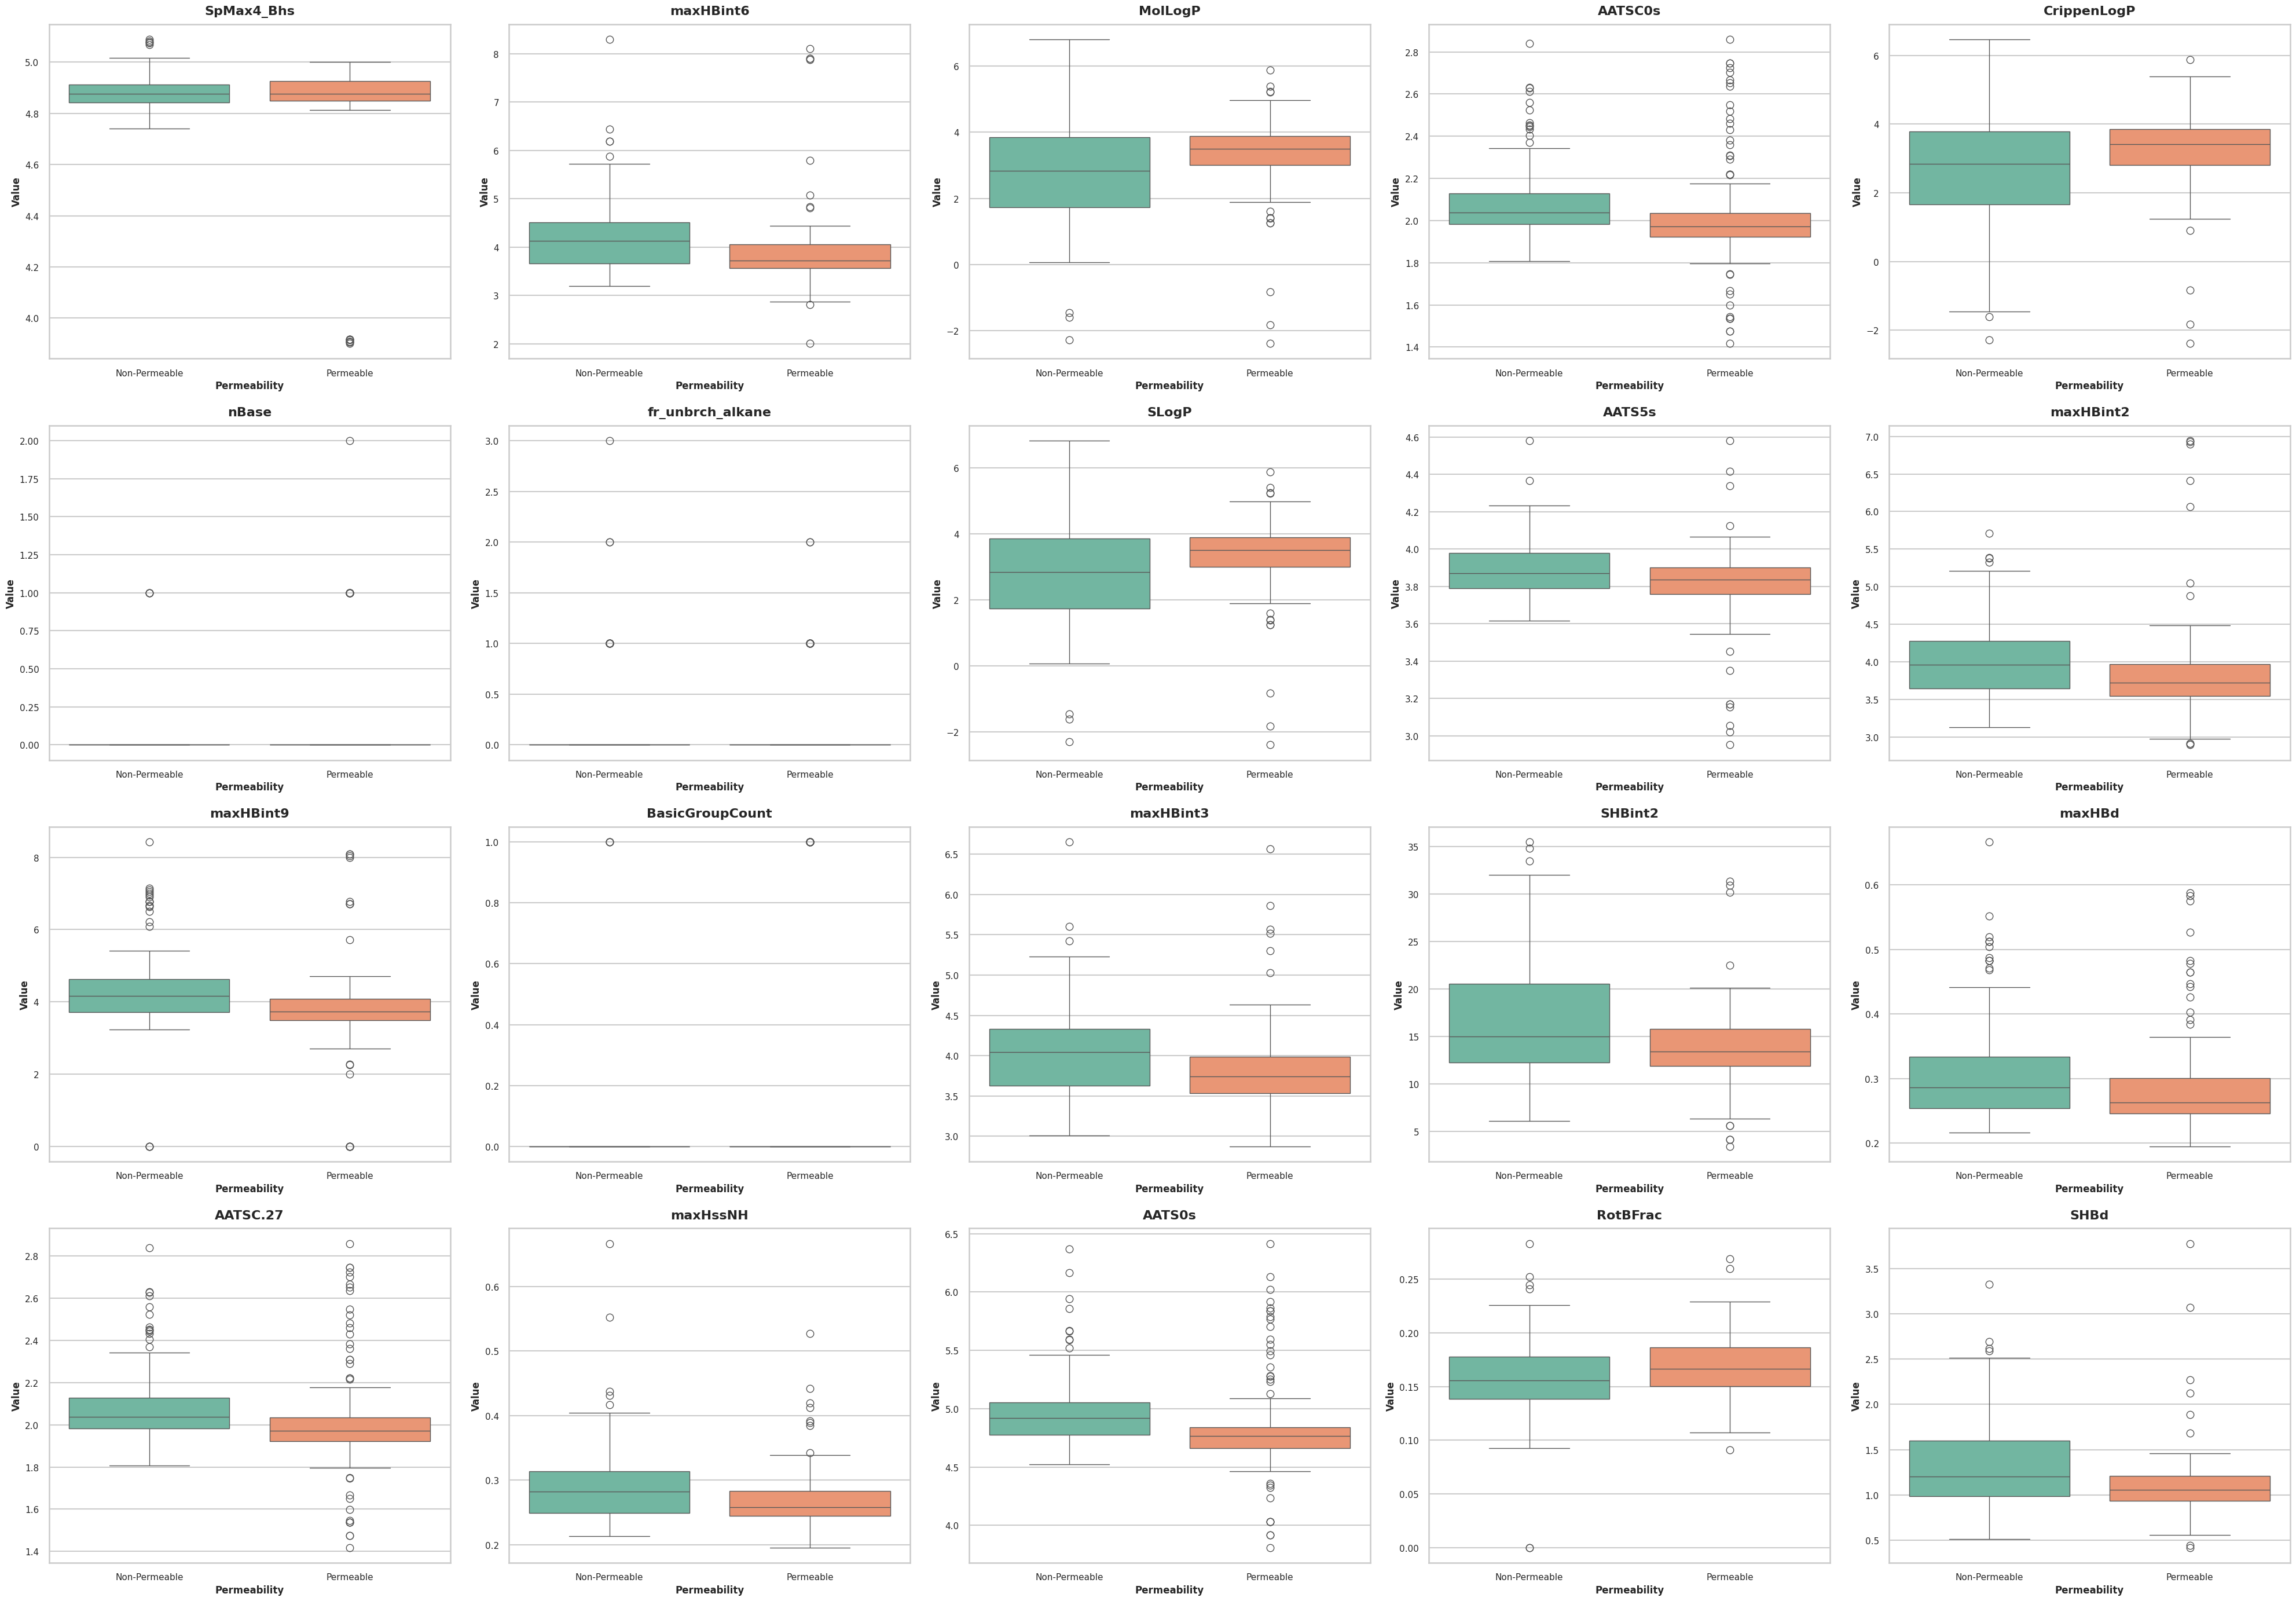

In [123]:
boxplots_diff_labels(test_df_labeled, feature_cols_test, label_col='Label', save_path = '/home/users/akshay/PCPpred/Caco2/results/feature_analysis/desc_test_box_plot_caco2.png')


Top Features Correlation with Permeability by Label:

         Feature  Corr_Label_0  Corr_Label_1
      SpMax4_Bhs      0.267744     -0.556731
       maxHBint6     -0.455960     -0.067531
         MolLogP      0.468615     -0.302207
         AATSC0s     -0.236959     -0.421641
     CrippenLogP      0.461686     -0.332659
           nBase     -0.043066      0.315863
fr_unbrch_alkane      0.044917     -0.117134
           SLogP      0.468615     -0.302207
          AATS5s     -0.511123     -0.530538
       maxHBint2     -0.455276     -0.045414
       maxHBint9     -0.182291     -0.073553
 BasicGroupCount     -0.043066      0.384479
       maxHBint3     -0.393956     -0.025287
         SHBint2     -0.413089     -0.303690
          maxHBd     -0.264729      0.186926
        AATSC.27     -0.236959     -0.421641
        maxHssNH     -0.433730      0.050408
          AATS0s     -0.345527     -0.416002
        RotBFrac      0.198492     -0.385079
            SHBd     -0.422536     -0.131164


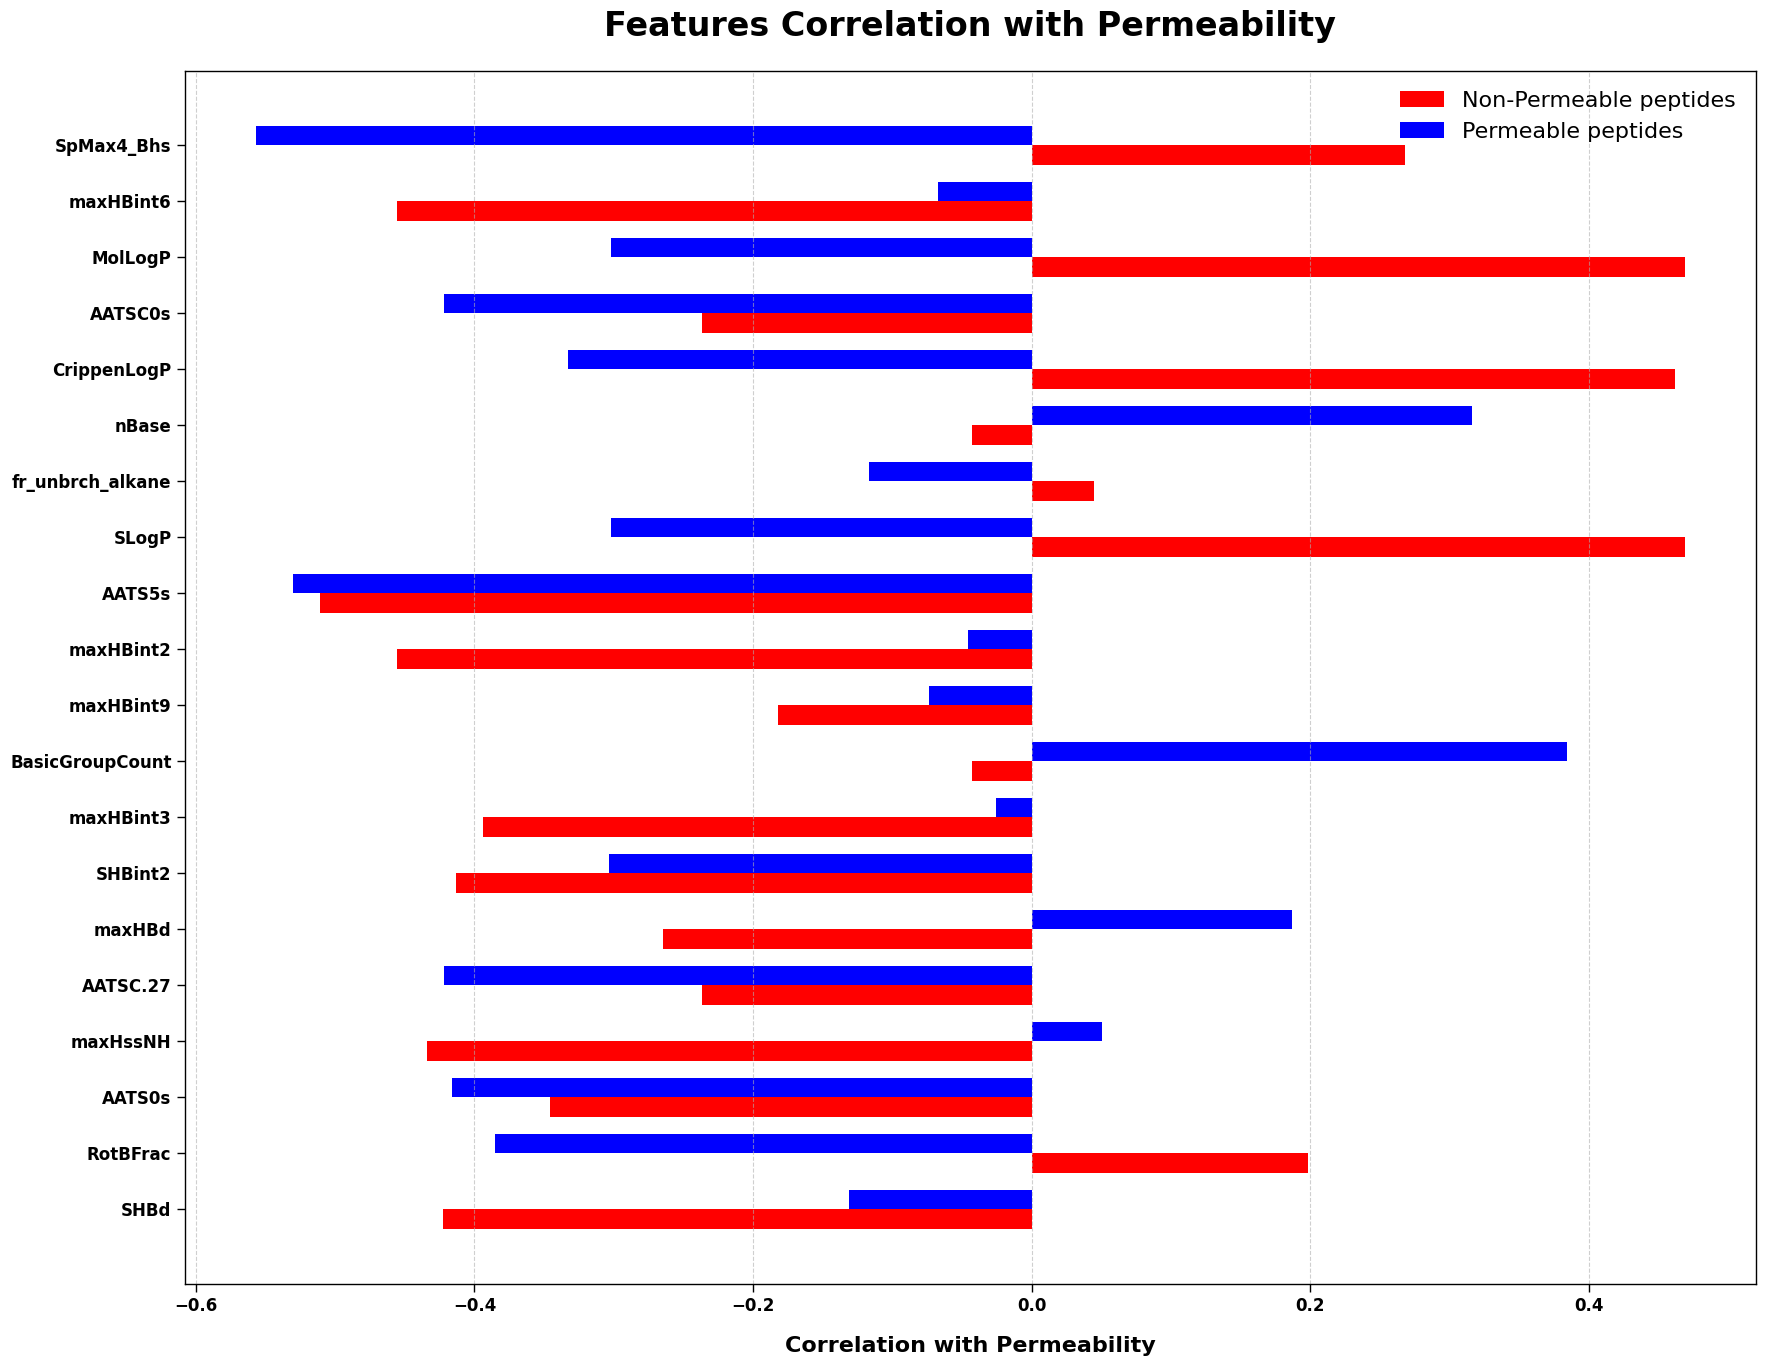

In [124]:
ET_top_features_list = ET_top_features_all['Feature'].to_list()

corr_df = plot_top_feature_correlations(
    test_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=ET_top_features_list,
    save_path = '/home/users/akshay/PCPpred/Caco2/results/feature_analysis/desc_test_corr_plot_caco2.png'
)

In [125]:
ttest_df_test = ttest_feature_tests(test_df_labeled, label_col='Label', feature_cols=feature_cols_test, save_path = '/home/users/akshay/PCPpred/Caco2/results/feature_analysis/caco2_ttest_test.csv')
print(ttest_df_test)

Feature: SpMax4_Bhs
T-Statistic: 2.5333, P-Value: 0.0126
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: maxHBint6
T-Statistic: 2.9114, P-Value: 0.0040
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: MolLogP
T-Statistic: -2.6217, P-Value: 0.0093
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: AATSC0s
T-Statistic: 2.0117, P-Value: 0.0458
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: CrippenLogP
T-Statistic: -2.2979, P-Value: 0.0224
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: nBase
T-Statistic: -3.3084, P-Value: 0.0012
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: fr_unbrch_alkane
T-Statistic: -0.6435, P-Value: 0.5205
Result: Fail to reject the null hypothesis - no significant difference between the two group